<a href="https://colab.research.google.com/github/ian-byrne/MADSmilestone2/blob/main/multimodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second half of the multimodel attempt.
- The idea is for the CNN to predict the scores of the clocks and then we would pass that data, along with the measurements of the other test and predict whether the patient was in class 0, 1, or 2.
- For the time being this being used to simply explore the predictive ability of the dataset without using the CNN for the clock scores.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git
# Change directory into cloned repo
%cd MADSmilestone2

fatal: destination path 'MADSmilestone2' already exists and is not an empty directory.
/content/MADSmilestone2


In [27]:
# !ls

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("Data/cleaned_nhat_data.csv")
# df.info()

In [89]:
df["r_spid"] = df["round"].astype("str") + "_" + df["spid"].astype("str")

In [90]:
df.drop(
    columns=["spid", "round"], 
    inplace=True
    )
df.set_index(
    "r_spid", 
    inplace=True)

In [91]:
df.head()

,cg1dclkdraw,hc1disescn9,cg1presidna1,cg1presidna3,cg1vpname1,cg1vpname3,cg1todaydat1,cg1todaydat2,cg1todaydat3,cg1todaydat4,cg1dwrdimmrc,cg1dwrddlyrc,cp1dad8dem,orientation_score,memory_score,label
r_spid,,,,,,,,,,,,,,,,
1_10000003,3.0,2,1,1,1,1,1.0,1.0,1.0,1.0,6.0,3.0,10,8.0,9.0,2
1_10000004,3.0,2,1,1,0,0,1.0,1.0,1.0,1.0,4.0,3.0,10,6.0,7.0,2
1_10000005,3.0,2,1,1,1,1,1.0,1.0,1.0,1.0,7.0,4.0,10,8.0,11.0,2
1_10000006,4.0,2,1,1,1,0,1.0,1.0,1.0,1.0,4.0,3.0,10,7.0,7.0,2
1_10000008,2.0,2,1,1,1,1,1.0,1.0,1.0,1.0,7.0,7.0,10,8.0,14.0,2


In [47]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_df = scaler.transform(X_train)

In [63]:
pca = PCA(n_components=2)
pca.fit(scaled_df)
x_pca = pca.transform(scaled_df)

Text(0, 0.5, 'Second Principal Component')

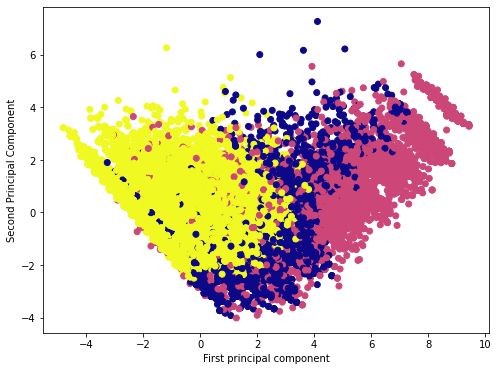

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(
    x_pca[:,0],
    x_pca[:,1], 
    c=y_train, 
    cmap='plasma'
)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

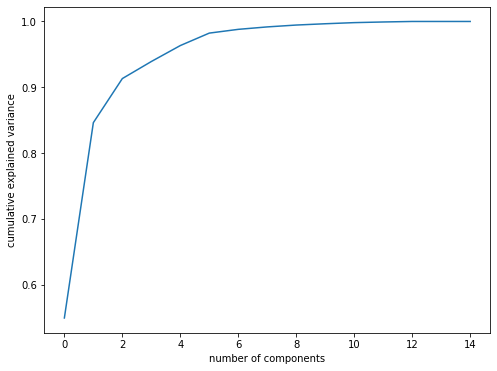

In [92]:
pca2 = PCA().fit(X_train)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Naive Bayes Classifer

In [103]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("percent correct: ", (X_test.shape[0]-(y_test != y_pred).sum()) / X_test.shape[0])

Number of mislabeled points out of a total 12841 points : 1571
percent correct:  0.877657503309711


In [104]:
cnb = ComplementNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("percent correct: ", (X_test.shape[0]-(y_test != y_pred).sum()) / X_test.shape[0])

Number of mislabeled points out of a total 12841 points : 2885
percent correct:  0.7753290242192976


## KNN Classifier

In [109]:
# loop through different n_neighbors 

In [107]:
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred = neigh.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("percent correct: ", (X_test.shape[0]-(y_test != y_pred).sum()) / X_test.shape[0])

Number of mislabeled points out of a total 12841 points : 285
percent correct:  0.9778054668639514


## Random Forest Classifier

In [110]:
# loop through different depths

In [111]:
rf = RandomForestClassifier(max_depth=3, random_state=42)
y_pred = rf.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("percent correct: ", (X_test.shape[0]-(y_test != y_pred).sum()) / X_test.shape[0])

Number of mislabeled points out of a total 12841 points : 854
percent correct:  0.9334942761467175
